 # ***33323 - Aditya Kangune***
# ***Assignment 4  LP Lab***


#Computational Stats
TE Sem I Honors in AI/ML
Academic Year: 2021-22
Lab Assignment No. 4

Date: 24/09/2021

###**Problem Statement:**
Apply Basic PCA on the IRIS dataset.

####**Objective:**
1. Describe the data set. Should the dataset be standardized?

2. Describe the structure of correlations among variables.

3. Compute a PCA with the maximum number of components

4. Compute the cumulative explained variance ratio.

5. Determine the number of components 𝐾 by your computed values.

6. Print the 𝐾 principal components directions and correlations of the 𝐾 principal components with the original variables.

7. Interpret the contribution of the original variables into the PC.

8. Plot the samples projected into the 𝐾 first PCs.

9. Color samples by their species.

###**The IRIS Dataset Description:**

• The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

• One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

• Number of Instances: 150 (50 in each of three classes)

• Number of Attributes: 4 numeric, predictive attributes and the class

• Attribute Information:

o sepal length in cm

o sepal width in cm

o petal length in cm

o petal width in cm

o class:

§ Iris Setosa

§ Iris Versicolor

§ Iris Virginica

####Hints:

1. For 2nd objective: use heatmap

2. For 3rd objective: use PCA from sklearn.decomposition

3. For 8th and 9th objective: use zip() function to plot projection of data on to PC


# Importing the needed libraries

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Checking if data cleaning is required

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Hence the dataset is clean

# Exploratory Data Analysis 

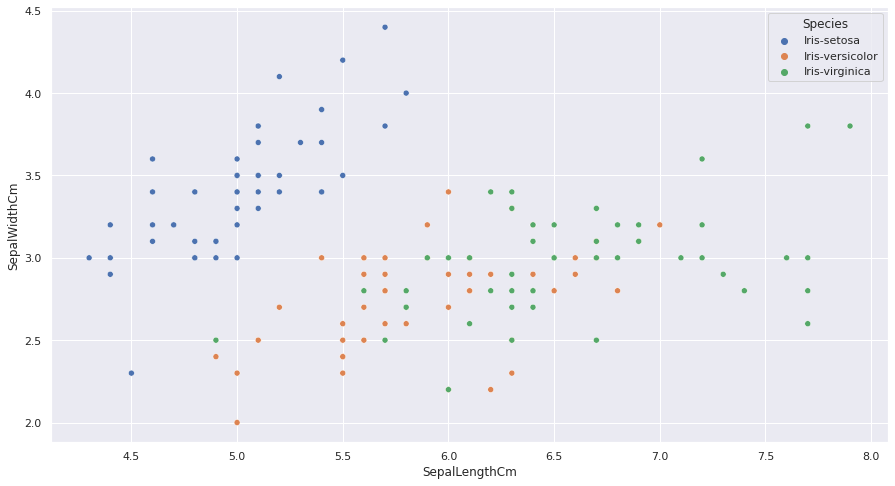

In [ ]:
plt.figure(figsize = (15,8))
sns.set(style="darkgrid")
sns.scatterplot(data=df,x="SepalLengthCm",y='SepalWidthCm',hue="Species")

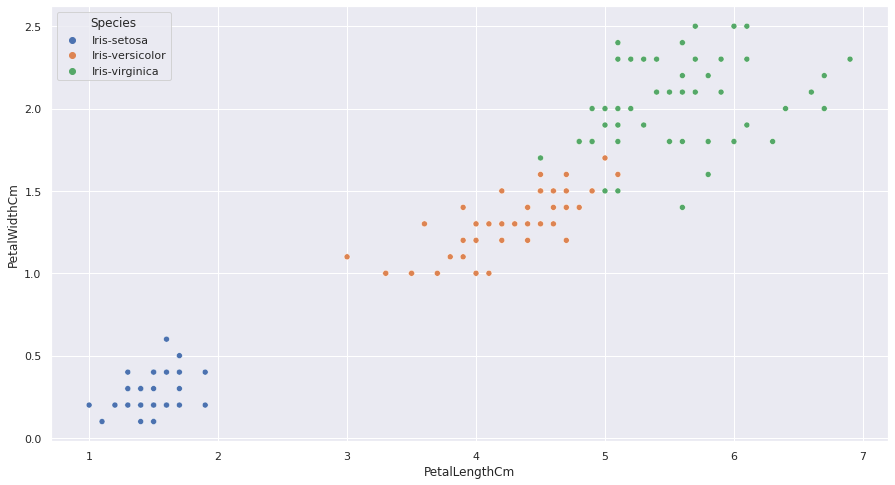

In [ ]:
plt.figure(figsize = (15,8))
sns.set(style="darkgrid")
sns.scatterplot(data=df,x="PetalLengthCm",y='PetalWidthCm',hue="Species")

####**Conclusion:**
Iris-setosa are very easy to identify whereas the other 2 are mostly similar in nature.

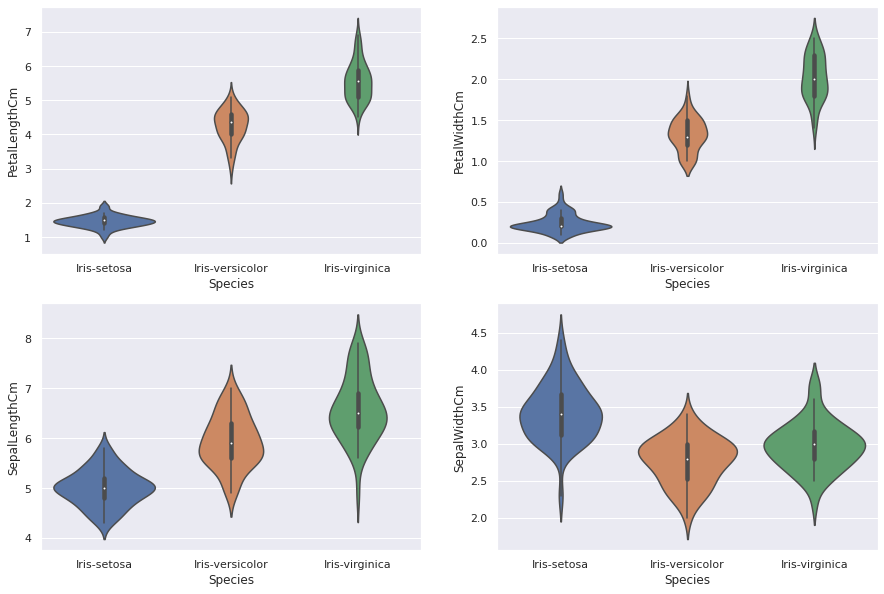

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

# Visualizing Correlation

In [ ]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


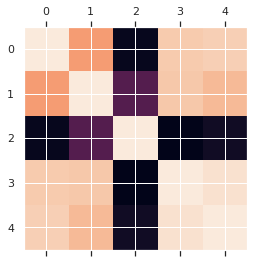

In [ ]:
plt.matshow(df.corr())
plt.show()

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


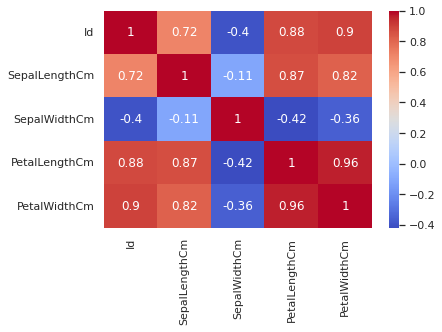

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Dark red means positive, Blue means negative. The stronger the color, the larger the correlation magnitude.

# Setting dependeant and independant variables

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

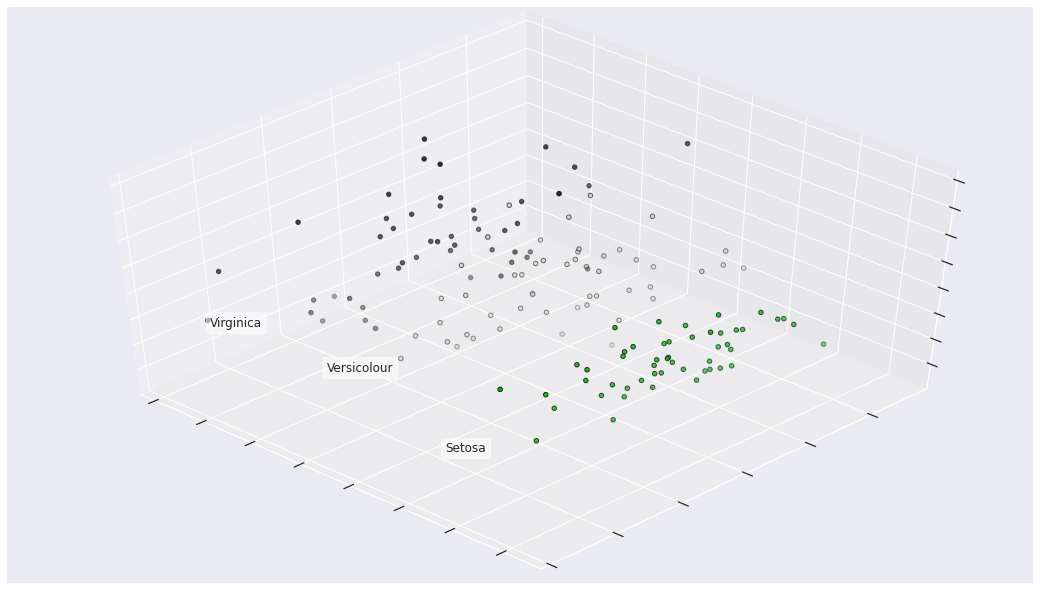

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(15, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

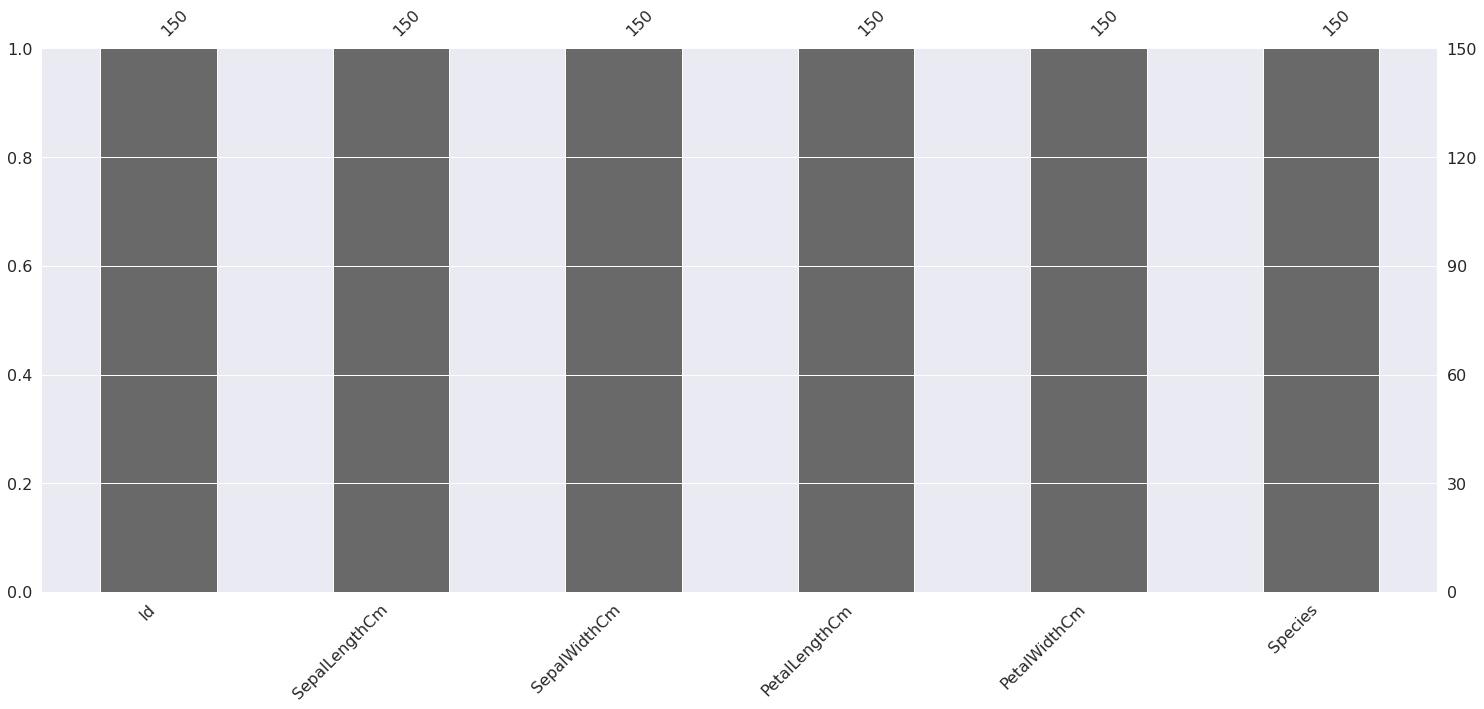

In [ ]:
import missingno as msno
p=msno.bar(df)

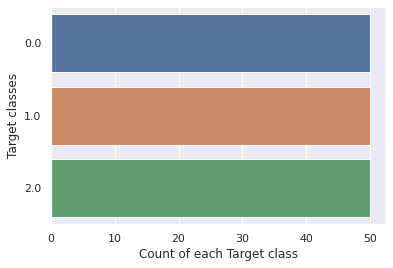

In [ ]:
sns.countplot(y=y ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

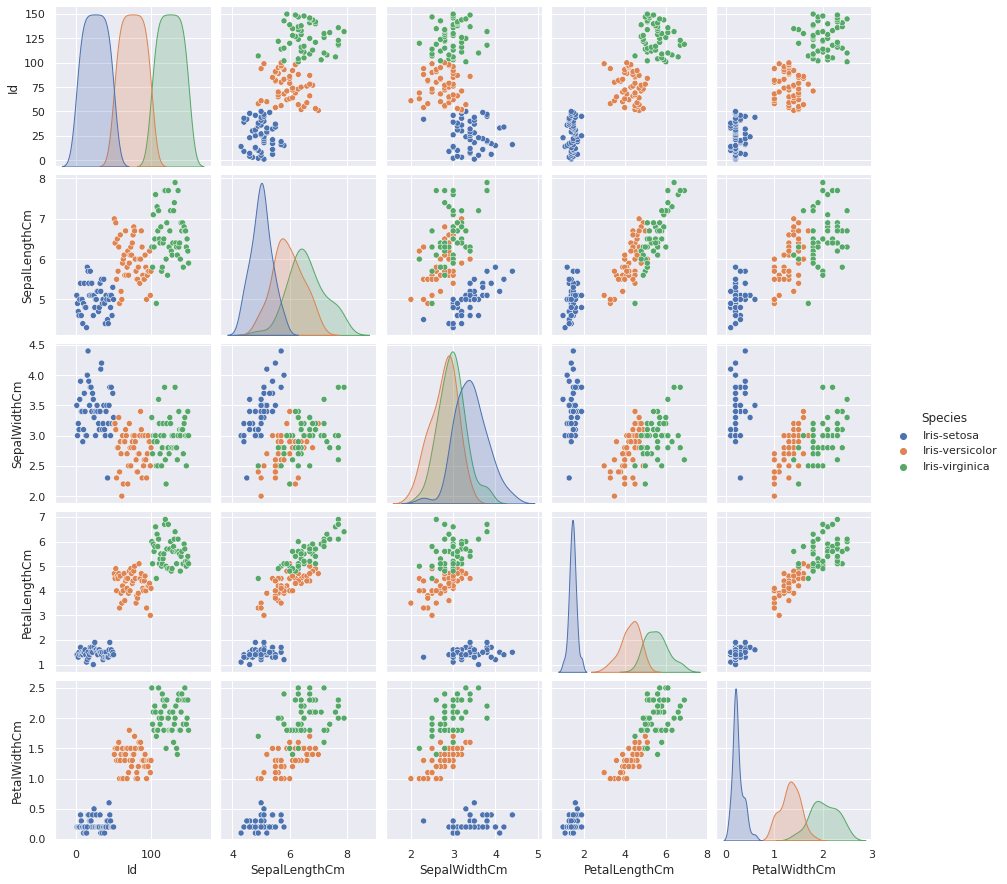

In [ ]:
p=sns.pairplot(df, hue = 'Species')

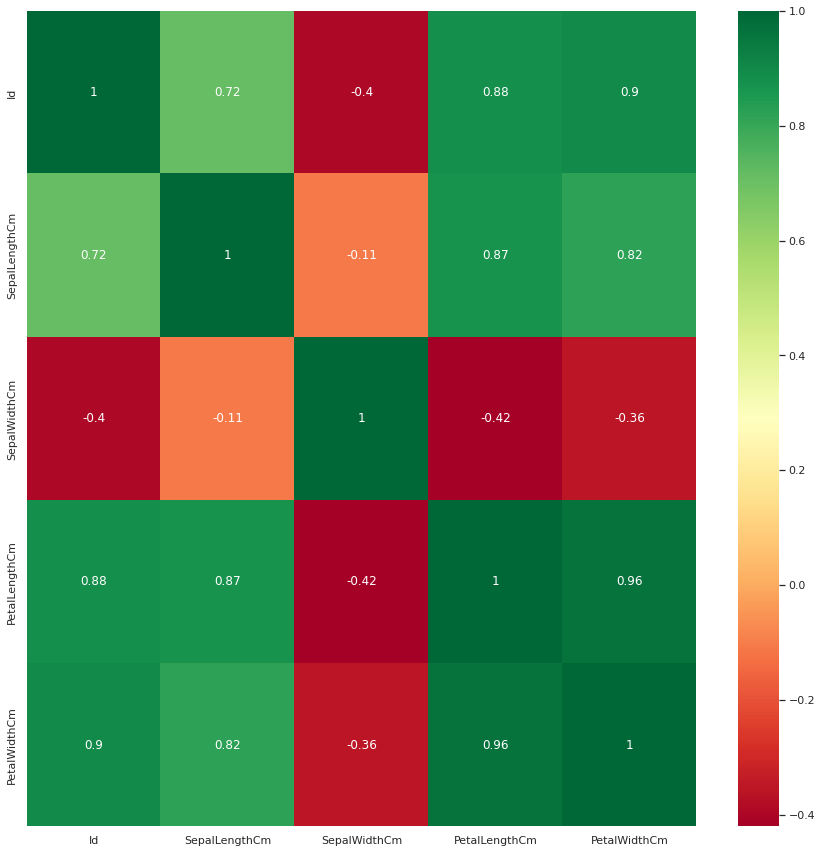

In [ ]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn') 

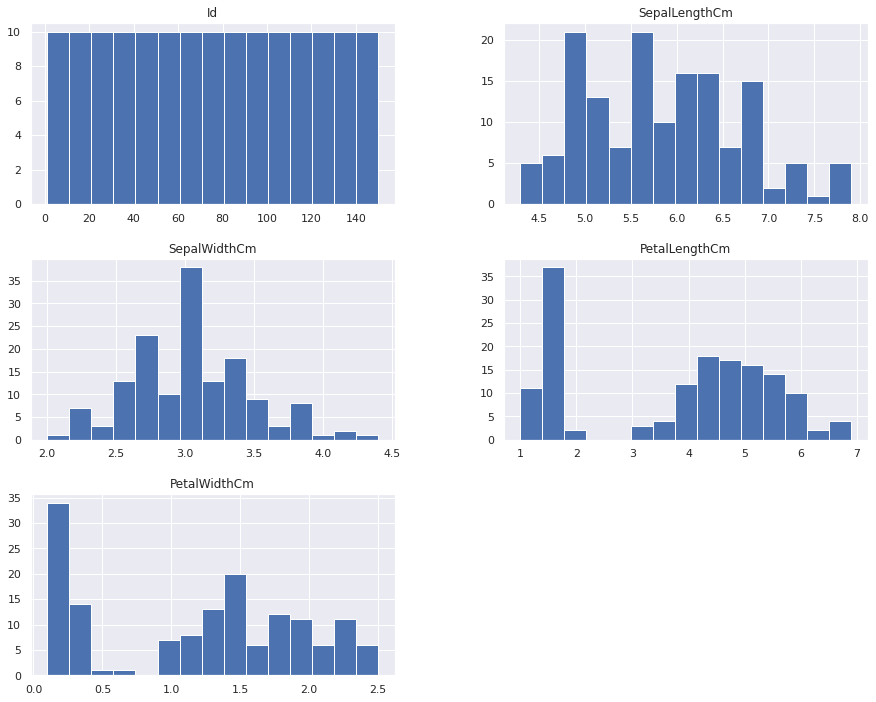

In [ ]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

As we see, the dependant varaible y does not contain numerical values, so we need to apply encoding on the categorical data

## Encoding categorical data

### Encoding the Dependent Variable

In [ ]:
# LabelEncoder for encoding binary categories in a column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # One single vector so it is ovbious what we want to encode, so no need of anything in the parenthesis
y = le.fit_transform(y)

In [ ]:
print(y)
# 0 - Iris-setosa
# 1 - Iris-versicolor
# 2 - Iris-virginica

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
# X: Independant variable, y : Dependant variable.
# Parameters for train_test_split:
            # X - Matrix features
            # y - Dependant variable vector
            # Test size - 20% recommended
            # radom_state - So that we get the same randomized result as the instructor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Feature Scaling

In [ ]:
# Standardisation - works always
# Normalisation - for normal distribution only

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Apply feature scaling only to numerical values and not on the categorical values
# We encoded categorical values, eveything will get changed and hence lost if we apply freature scaling on categorically encoded values.

# fir method calculates mean and SD
X_train = sc.fit_transform(X_train)

# We need to apply same scaling to test as we did for the train
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_train)

[[ 0.40648348  0.01540903 -0.01622987]
 [ 1.46700498  1.5620388  -1.11120705]
 [-0.00380648 -1.16052585 -0.7729742 ]
 [ 1.00465028 -0.3597485   0.53564433]
 [ 0.74376099 -1.06592863  2.13231732]
 [-1.25968811  1.32941686 -0.04033246]
 [ 0.06319687 -1.68307843 -0.58665658]
 [-1.30648635  0.75710714 -0.47339974]
 [ 0.5022101   0.24884321 -1.01761435]
 [ 1.10053801 -0.43274441 -1.15395129]
 [ 1.02502099  0.55212196  0.12927681]
 [-1.31073778  0.75669865  0.1068883 ]
 [ 0.6054092  -1.54007192 -1.14282363]
 [ 0.93086029 -0.29552967  0.38179268]
 [ 0.48087462  0.5779929  -1.37934425]
 [ 1.81594335  0.63998453 -1.71031915]
 [-1.09313144  1.95750624 -0.38730882]
 [-1.34975848  0.78860382  0.3201065 ]
 [-1.34283687 -0.44639384 -0.31122463]
 [-0.02999455 -1.45858735  0.96254998]
 [-1.28245455  0.5794526  -0.2520589 ]
 [-1.29954943  1.37214155 -0.88510721]
 [ 1.6662116   2.60586902  0.46743584]
 [ 0.99688805  0.88606868  0.10898251]
 [ 1.39717666  0.85013399 -1.39583337]
 [ 1.02203492 -0.37590533

In [ ]:
print(X_test)

[[-1.22331195  1.85550856 -0.93159496]
 [-0.34911173 -1.691674   -0.17905887]
 [ 0.55946935  0.29672336 -1.82244909]
 [-1.21263892  1.1806967   0.63710519]
 [ 1.73150285  2.21373695 -0.73089043]
 [ 0.65747979  0.21415832  0.80829724]
 [ 1.07349128  0.44466913  0.50396747]
 [-1.00441437  0.49501106  1.50618868]
 [-1.2168943  -0.66661491  0.1098285 ]
 [ 1.32773794  0.38782305  1.07519959]
 [ 0.28629173 -1.23117874 -0.02091282]
 [-1.04030732  1.05355879  0.80216676]
 [ 1.42271674  0.32495381 -0.7105364 ]
 [ 0.5757205   0.27807713 -0.20836692]
 [ 0.51577458 -0.60499587  0.08088833]
 [-1.40066657 -0.93237949  0.93116322]
 [ 0.22270696 -1.04688726 -1.35262062]
 [ 0.43882575 -0.95262578  1.66470262]
 [-1.10521947  0.44782388 -0.89856281]
 [-1.33470232 -0.17835899 -1.00036396]
 [ 0.34051498 -1.53514318 -0.24242815]
 [ 0.4024767  -1.19337112  2.29478988]
 [ 0.89019753  0.18487528 -1.00355038]
 [-1.28635285  0.17760089  0.30727069]
 [ 1.42141644  0.72277745 -1.22338511]
 [ 0.25713263 -0.94516082

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Testing the model

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 2]
 [1 1]
 [1 1]
 [2 2]
 [0 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 6  0  0]
 [ 0 11  0]
 [ 3  0 10]]


0.9

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      1.00      1.00        11
           2       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



sns.heatmap(cm,annot=True)

# Similarly evaluating performance for different classifiers

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_1 = LogisticRegression()
classifier_1.fit(X_train,y_train)

y_pred_1 = classifier_1.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.9


# SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.8333333333333334


# Kernal-SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.8666666666666667


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.8666666666666667


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.9


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.8666666666666667


***
Conclusion:
We get a highest accuracy 96.67% for Logistic Regression, SVM, Kernal-SVM, KNN and Naive Bayes 
***

# Modelling **with** PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [ ]:
pca.get_covariance()

array([[ 4.22824171e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.42670748e-01, -3.17297990e-17],
       [ 0.00000000e+00, -3.17297990e-17,  7.82095000e-02]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92946326, 0.05334452, 0.01719222])

### Cumulative explained variance ratio

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[4.22824171 0.24267075 0.0782095 ]
[0.92946326 0.05334452 0.01719222]
[0.92946326 0.98280778 1.        ]


In [ ]:
# component loadings
loadings = pca.components_
print(loadings)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00 -1.66533454e-16]
 [ 0.00000000e+00  1.11022302e-16  1.00000000e+00]]


In [ ]:
# ! pip install bioinfokit
# get biplot
from bioinfokit.visuz import cluster
from bioinfokit.analys import get_data

# load iris dataset
df = get_data('iris').data
df.head(2)

X = df.iloc[:,0:4]
target = df['class'].to_numpy()

X_st =  StandardScaler().fit_transform(X)
pca_out = PCA().fit(X_st)



In [ ]:
# component loadings
loadings = pca_out.components_
print(loadings)


[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [ ]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_


array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [ ]:
# get biplot
pca_scores = PCA().fit_transform(X_st)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist=target)

Eigenvectors


In [ ]:
from numpy.linalg import eig

eigenvalues, eigenvectors = eig(X.cov())


In [ ]:
print(eigenvalues)

[4.22484077 0.24224357 0.07852391 0.02368303]


In [ ]:
# we are interested in highest eigenvalues as it explains most of the variance
# this helps to reduce the dimensions
print(eigenvectors)


[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


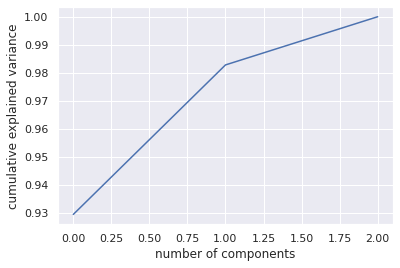

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# with plt.style.context('dark_background'):
#     plt.figure(figsize=(6, 4))

#     plt.bar(range(4), explained_variance, alpha=0.5, align='center', label='individual explained variance')
#     plt.ylabel('Explained variance ratio')
#     plt.xlabel('Principal components')
#     plt.legend(loc='best')
#     plt.tight_layout()

In [ ]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA: ",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA: ",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA:  0.9714285714285714 %
Test score after PCA:  0.9777777777777777 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


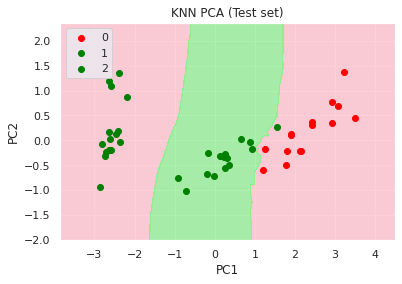

In [ ]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# PCA for Data Visualization

## PCA Projection to 2D

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['species'])
fig.show()

## Visualize 2D Projection

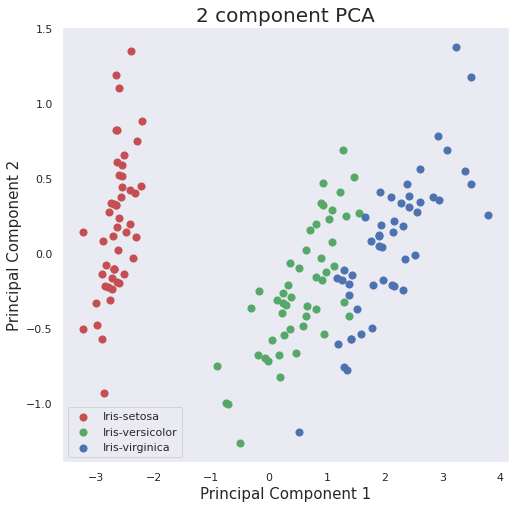

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Visualize PCA with px.scatter_3d

In [ ]:
df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# Plotting explained variance

In [ ]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514])

In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

# Visualize Loadings

In [ ]:
components = pca.fit_transform(X)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

Final answers for the assignment:


1. Dataset has been described and feature scaaling has been applied after train-test-split

2. EDA has been done along with visualization of correlations.

3. PCA has 3 components.

4. array([0.92461621, 0.05301557, 0.01718514]) is explained_variance_ratio_

5. k = 3

6. 𝐾 principal components directions and correlations of the 𝐾 principal components with the original variables have been printed

7. Eigenvalues and vectors have been printed

8. The samples projected into the 𝐾 first PCs have been plotted.

9. Samples have been colored
 by their species.